In [1]:
# Load and preprocess the MNIST dataset
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load MNIST dataset (handwritten digits 0-9)
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize the images (convert pixel values from 0-255 to 0-1)
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape to add a single channel (grayscale images)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)


2025-03-17 16:23:14.682224: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# Define a CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)), # 32 filters of 3x3
    tf.keras.layers.MaxPooling2D((2,2)),  
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')  # 10 output classes (digits 0-9)
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model on MNIST (using a subset for quick training)
model.fit(X_train[:10000], y_train[:10000], epochs=5, batch_size=64, validation_data=(X_test[:2000], y_test[:2000]))


/Users/tkmagesh77/Documents/Training/Nutanix-Intermediate-ML-Mar-2025/int_ml_env/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 10s 52ms/step - accuracy: 0.7148 - loss: 0.9609 - val_accuracy: 0.9440 - val_loss: 0.2028
Epoch 2/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 47ms/step - accuracy: 0.9573 - loss: 0.1463 - val_accuracy: 0.9575 - val_loss: 0.1485
Epoch 3/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 44ms/step - accuracy: 0.9737 - loss: 0.0894 - val_accuracy: 0.9535 - val_loss: 0.1357
Epoch 4/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 43ms/step - accuracy: 0.9809 - loss: 0.0659 - val_accuracy: 0.9605 - val_loss: 0.1335
Epoch 5/5
157/157 ━━━━━━━━━━━━━━━━━━━━ 7s 45ms/step - accuracy: 0.9854 - loss: 0.0517 - val_accuracy: 0.9695 - val_loss: 0.0917


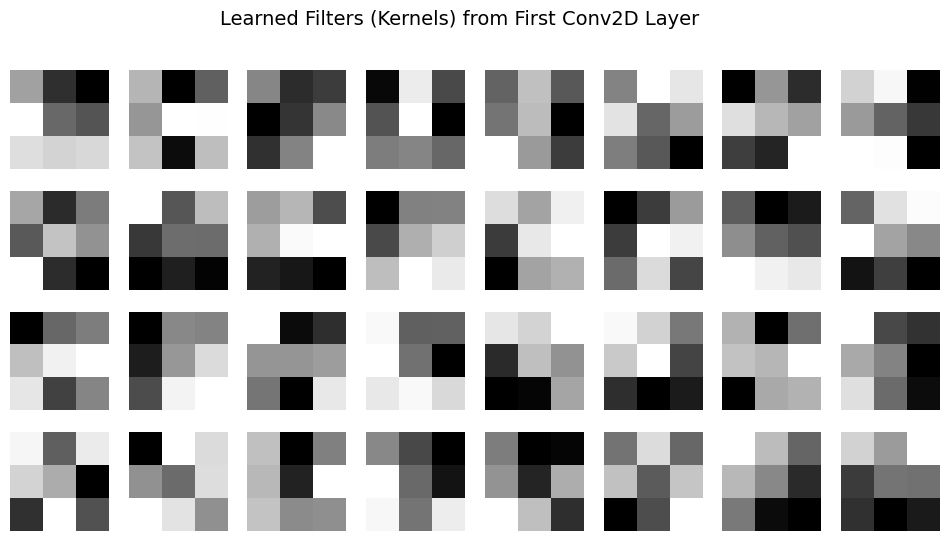

In [3]:
#Extract and visualize filters
# Get the first Conv2D layer
conv_layer = model.layers[0]  # First convolutional layer

# Get the filters (weights)
filters, biases = conv_layer.get_weights()

# Normalize filter values for visualization
filters_min = filters.min()
filters_max = filters.max()
filters = (filters - filters_min) / (filters_max - filters_min)

# Plot all 32 filters
fig, axes = plt.subplots(4, 8, figsize=(12, 6))
for i in range(32):  # 32 filters
    ax = axes[i // 8, i % 8]
    ax.imshow(filters[:, :, 0, i], cmap='gray')  # Show as grayscale
    ax.axis('off')

plt.suptitle("Learned Filters (Kernels) from First Conv2D Layer", fontsize=14)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
Predicted Label: 7


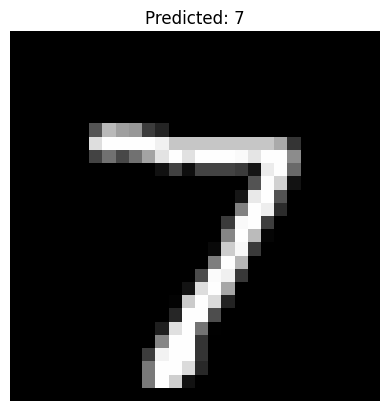

In [4]:
# Predict on a sample image
sample_image = X_test[0].reshape(1, 28, 28, 1)
prediction = model.predict(sample_image)

predicted_label = np.argmax(prediction)
print(f"Predicted Label: {predicted_label}")

# Display image
plt.imshow(X_test[0].reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {predicted_label}")
plt.axis('off')
plt.show()


In [5]:
print(prediction)

[[9.8624227e-08 4.5791957e-09 6.7109040e-06 3.3478270e-04 1.1565542e-10
  1.5257740e-08 1.3176262e-13 9.9965823e-01 4.6891937e-08 2.4154193e-07]]
